# Marketing Analytics HW01
### Group: Zhe Jiang / Yiwei Yang / Zonghao Shen/ Libo Zhu
A private equity firm has just invested in a family-owned, local fast food chain, which operates 9 locations in the Chicago area. In preparation for their first board meeting, they have requested a data-driven review of marketing strategy. With the infusion of private equity cash, the new board’s focus is now on rapid growth. This will be their first deep-dive on current customer consumption patterns as they get to know the business.

In [11]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
#import data and read it as dataframe type
df = pd.read_csv('/Users/awesomezoey/Desktop/transactions_n100000.csv')
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


In [13]:
#What the data look like & How many unique values
print("Data shape:",df.shape)
print("Total unique ticket_id:", len(df['ticket_id'].unique()))
print("Total unique order_timestamp:", len(df["order_timestamp"].unique()))
print("Total unique location:", len(df["location"].unique()))
print("Total unique item_name:", len(df["item_name"].unique()))

Data shape: (260741, 7)
Total unique ticket_id: 100000
Total unique order_timestamp: 76790
Total unique location: 9
Total unique item_name: 4


In [14]:
df_processed_item = pd.pivot_table(df, index= 'ticket_id', columns ='item_name', values='item_count', aggfunc = np.sum)

In [15]:
df = pd.merge(df, df_processed_item, on='ticket_id', how='left')
df

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,burger,fries,salad,shake
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2.0,2.0,NaN,2.0
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2.0,2.0,NaN,2.0
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,2.0,2.0,NaN,2.0
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,1.0,3.0,2.0,NaN
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,1.0,3.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468,3.0,4.0,1.0,3.0
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468,3.0,4.0,1.0,3.0
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468,3.0,4.0,1.0,3.0
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606,3.0,3.0,NaN,NaN


In [16]:
#Turn location to dummy
df_location = pd.get_dummies(df['location'])
df= pd.concat([df, df_location], axis=1)
del df["location"]
print (df.head())

  ticket_id      order_timestamp item_name  item_count        lat       long  \
0  0x872a40  2019-02-28 18:33:00     shake           2  41.889047 -87.803605   
1  0x872a40  2019-02-28 18:33:00    burger           2  41.889047 -87.803605   
2  0x872a40  2019-02-28 18:33:00     fries           2  41.889047 -87.803605   
3  0x598eb3  2019-09-18 11:59:00    burger           1  41.881818 -87.640234   
4  0x598eb3  2019-09-18 11:59:00     salad           2  41.881818 -87.640234   

   burger  fries  salad  shake  1  2  3  4  5  6  7  8  9  
0     2.0    2.0    NaN    2.0  0  0  0  1  0  0  0  0  0  
1     2.0    2.0    NaN    2.0  0  0  0  1  0  0  0  0  0  
2     2.0    2.0    NaN    2.0  0  0  0  1  0  0  0  0  0  
3     1.0    3.0    2.0    NaN  0  0  0  0  1  0  0  0  0  
4     1.0    3.0    2.0    NaN  0  0  0  0  1  0  0  0  0  


In [17]:
# Delete unneeded columns such as item_name and item_count (which are merged in new variables).
# Meanwhile, delete the timestamp (may not be a good classifier)
del df["item_name"]
del df["item_count"]
del df["order_timestamp"]
df.fillna(0, inplace=True)

In [18]:
df.head()

,ticket_id,lat,long,burger,fries,salad,shake,1,2,3,4,5,6,7,8,9
0,0x872a40,41.889047,-87.803605,2.0,2.0,0.0,2.0,0,0,0,1,0,0,0,0,0
1,0x872a40,41.889047,-87.803605,2.0,2.0,0.0,2.0,0,0,0,1,0,0,0,0,0
2,0x872a40,41.889047,-87.803605,2.0,2.0,0.0,2.0,0,0,0,1,0,0,0,0,0
3,0x598eb3,41.881818,-87.640234,1.0,3.0,2.0,0.0,0,0,0,0,1,0,0,0,0
4,0x598eb3,41.881818,-87.640234,1.0,3.0,2.0,0.0,0,0,0,0,1,0,0,0,0


In [19]:
#drop duplicated ticket_id
df.drop_duplicates(subset=['ticket_id'], inplace=True)
df.shape

(100000, 16)

In [20]:
df.describe()

,lat,long,burger,fries,salad,shake,1,2,3,4,5,6,7,8,9
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.844539,-87.721267,1.858460,2.568670,0.710210,1.241490,0.086820,0.157710,0.086910,0.113380,0.083070,0.156070,0.112370,0.089620,0.114050
std,0.141238,0.131423,1.588601,1.332315,1.084658,1.627329,0.281573,0.364471,0.281705,0.317058,0.275989,0.362924,0.315823,0.285638,0.317874
min,41.524598,-88.010140,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.784576,-87.803605,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.881818,-87.640234,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.889047,-87.627059,3.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.049306,-87.607565,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.head()

,ticket_id,lat,long,burger,fries,salad,shake,1,2,3,4,5,6,7,8,9
0,0x872a40,41.889047,-87.803605,2.0,2.0,0.0,2.0,0,0,0,1,0,0,0,0,0
3,0x598eb3,41.881818,-87.640234,1.0,3.0,2.0,0.0,0,0,0,0,1,0,0,0,0
6,0x5646c2,41.884490,-87.627059,0.0,3.0,3.0,0.0,0,0,1,0,0,0,0,0,0
8,0x4022cf,41.889047,-87.803605,0.0,4.0,4.0,0.0,0,0,0,1,0,0,0,0,0
10,0x7a39d9,41.794132,-88.010140,5.0,5.0,0.0,5.0,0,0,0,0,0,0,1,0,0


In [22]:
df_kmeans = df.copy()
del df_kmeans["ticket_id"]
df_kmeans.head()

,lat,long,burger,fries,salad,shake,1,2,3,4,5,6,7,8,9
0,41.889047,-87.803605,2.0,2.0,0.0,2.0,0,0,0,1,0,0,0,0,0
3,41.881818,-87.640234,1.0,3.0,2.0,0.0,0,0,0,0,1,0,0,0,0
6,41.884490,-87.627059,0.0,3.0,3.0,0.0,0,0,1,0,0,0,0,0,0
8,41.889047,-87.803605,0.0,4.0,4.0,0.0,0,0,0,1,0,0,0,0,0
10,41.794132,-88.010140,5.0,5.0,0.0,5.0,0,0,0,0,0,0,1,0,0


### K-Means

In [27]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-',color="r")
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

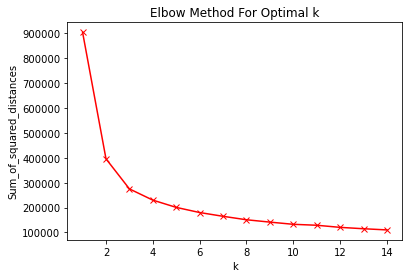

In [28]:
fitting(df_kmeans)

K=4 should be a good parameter for K-means clustering.

In [29]:
kmean=KMeans(n_clusters=4).fit(df_kmeans)
x = pd.DataFrame(kmean.cluster_centers_, columns=["lat","long","burger","fries","salad","shake","Loc1","Loc2","Loc3","Loc4",
                                                  "Loc5","Loc6","Loc7","Loc8","Loc9"])
x

,lat,long,burger,fries,salad,shake,Loc1,Loc2,Loc3,Loc4,Loc5,Loc6,Loc7,Loc8,Loc9
0,41.882278,-87.671983,1.067750,1.355484,0.287734,0.229673,0.081912,0.274337,0.081958,0.045058,0.074495,0.270791,0.044966,0.079826,0.046658
1,41.770325,-87.834348,4.287169,4.368932,0.081763,4.028811,0.031803,0.040304,0.028759,0.268224,0.029756,0.038048,0.260352,0.039097,0.263658
2,41.869862,-87.663023,0.267793,2.875150,2.607356,0.092105,0.198913,0.042414,0.197817,0.039474,0.197169,0.039673,0.043112,0.200758,0.040670
3,41.803826,-87.785547,2.971979,3.238936,0.266956,2.008401,0.031065,0.130575,0.035970,0.196820,0.032136,0.135480,0.195693,0.042003,0.200259


In [30]:
kmean=KMeans(n_clusters=6).fit(df_kmeans)
x = pd.DataFrame(kmean.cluster_centers_, columns=["lat","long","burger","fries","salad","shake","Loc1","Loc2","Loc3","Loc4",
                                                  "Loc5","Loc6","Loc7","Loc8","Loc9"])
x

,lat,long,burger,fries,salad,shake,Loc1,Loc2,Loc3,Loc4,Loc5,Loc6,Loc7,Loc8,Loc9
0,41.888021,-87.673632,1.376142,1.390985,0.014843,0.282531,0.041900,0.357484,0.041997,0.044401,0.031898,0.351040,0.044048,0.040842,0.046389
1,41.768275,-87.837018,4.275921,4.358974,0.083053,4.060824,0.031771,0.034757,0.028520,0.271976,0.029799,0.032624,0.263820,0.039235,0.267498
2,41.868415,-87.665738,0.284913,1.756925,1.472012,0.099890,0.193152,0.050364,0.191827,0.043605,0.189618,0.050497,0.045681,0.190678,0.044577
3,41.869618,-87.663686,0.229962,3.522583,3.292621,0.078562,0.195717,0.041985,0.196459,0.040925,0.199640,0.040925,0.044317,0.199534,0.040500
4,41.892756,-87.666727,3.960122,4.044151,0.084028,0.696236,0.032960,0.374364,0.033774,0.039064,0.022991,0.389420,0.036826,0.038454,0.032146
5,41.772622,-87.827079,2.650084,2.972448,0.322363,2.505357,0.030537,0.045308,0.037119,0.251492,0.035589,0.046074,0.251110,0.043242,0.259529
